In [1]:
#Donloading libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv(r"C:\Users\kubus\Downloads\archive (21)\data_science_salaries.csv")
data = data.dropna()


data = data.drop("employment_type", axis=1)




  

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   work_models         6599 non-null   object
 3   work_year           6599 non-null   int64 
 4   employee_residence  6599 non-null   object
 5   salary              6599 non-null   int64 
 6   salary_currency     6599 non-null   object
 7   salary_in_usd       6599 non-null   int64 
 8   company_location    6599 non-null   object
 9   company_size        6599 non-null   object
dtypes: int64(3), object(7)
memory usage: 515.7+ KB


Exploratory data analysis 

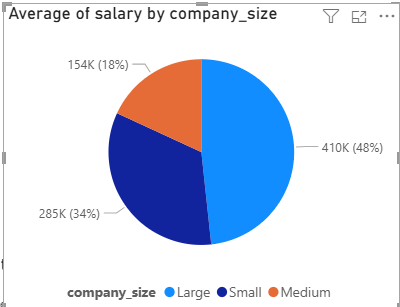


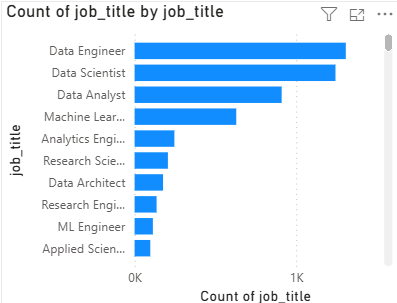

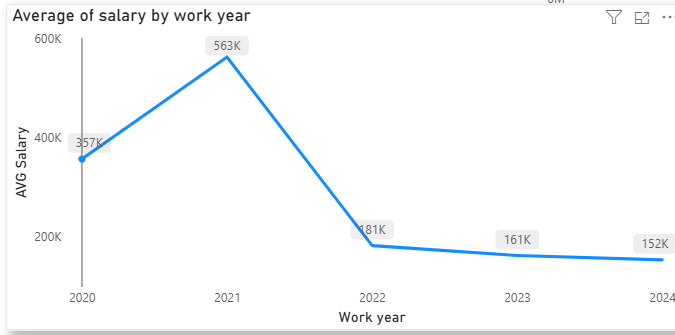

As we see at the chart in years 2020-2021 data seems unreal and we need to examine this further

In [ ]:
data["work_year"].value_counts()

#Get rid of years before 2022
data = data[data["work_year"] >= 2022]


In [27]:
data["work_year"].value_counts()

work_year
2023    4625
2022    1112
2024     571
Name: count, dtype: int64

In [33]:
label_cols = ["job_title", "work_models", "work_year", "employee_residence", "salary_currency", "company_location", "company_size"]
label_encoders = {}
data["salaries_bins"] = pd.cut(data["salary"], bins=[0, 50000, 100000, 150000, 200000, float("inf")], labels=[1, 2, 3, 4, 5])
data["salaries_bins"] = data["salaries_bins"].astype(int)

for col in label_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
target_encoder = LabelEncoder()
data["experience_level"] = target_encoder.fit_transform(data["experience_level"])

X = data[["job_title", "company_size", "salaries_bins", "work_models", "work_year", "employee_residence", "salary_currency", "company_location"]]
y = data["experience_level"]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

                 precision    recall  f1-score   support

    Entry-level       0.30      0.20      0.24        96
Executive-level       0.60      0.38      0.47        55
      Mid-level       0.37      0.38      0.37       313
   Senior-level       0.73      0.77      0.75       798

       accuracy                           0.61      1262
      macro avg       0.50      0.43      0.46      1262
   weighted avg       0.60      0.61      0.60      1262

